## Imports
#### In a Linear regression model our motto is to find the coef_ and intercept_ for the given data.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Read the CSV file

In [20]:
df = pd.read_csv('Canada_Per_Capita.csv')
df.head()

,year,per_capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### Visualize the Data using matplotlib

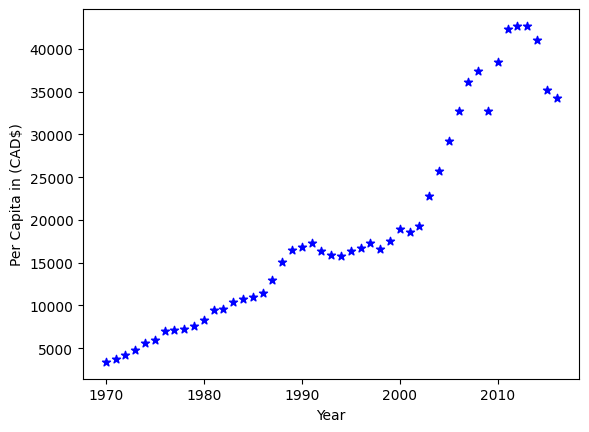

In [21]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Per Capita in (CAD$)')
plt.scatter(df.year, df.per_capita, color='blue', marker='*')

### Split the data columns

In [22]:
new_df = df.drop('per_capita', axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [23]:
per_capita = df.per_capita
per_capita.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per_capita, dtype: float64

### Fit the model

In [24]:
reg = linear_model.LinearRegression()
reg.fit(new_df, per_capita)

LinearRegression()

In [25]:
reg.predict([[2020]])

C:\Users\harih\anaconda3\envs\MYAI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

# m*x+b
#### coef_(m) * year(x) + intercept_(b)

In [26]:
reg.coef_

array([828.46507522])

In [27]:
reg.intercept_

-1632210.7578554575

In [28]:
# m*x+b
828.46507522*2020 + (-1632210.7578554575)

41288.694088942604

### CSV input and output
#### Reading CSV input that has only column year.

In [29]:
per_capita_df = pd.read_csv("Predict_percapita.csv")
per_capita_df.head()

,year
0,2016
1,2017
2,2018
3,2019
4,2020


### Predict values for the input

In [30]:
p = reg.predict(per_capita_df)
p

array([37974.83379353, 38803.29886875, 39631.76394397, 40460.22901919,
       41288.69409442, 42117.15916964, 42945.62424486])

### Add a new column as percapita to the dataframe

In [31]:
per_capita_df['Per_capita'] = p
per_capita_df

,year,Per_capita
0,2016,37974.833794
1,2017,38803.298869
2,2018,39631.763944
3,2019,40460.229019
4,2020,41288.694094
5,2021,42117.159170
6,2022,42945.624245


### Sketch the scatter diagram and predict the values with a linear line that shows the relationship of the data

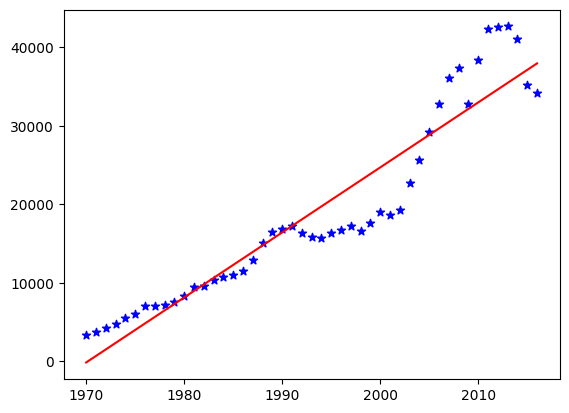

In [32]:
plt.scatter(df.year, df.per_capita, color='blue', marker='*')
plt.plot(df.year,reg.predict(df[['year']]),color='red')

### Export the resultant dataframe as CSV file

In [33]:
per_capita_df.to_csv("Prediction_Percapita.csv",index=False)